# **HEART DISEASE PREDICTION**

**by:** *José Max Barrios Lara*

  **Data Scientist**


Based on some patient characteristics, predict which types of people are more prone to heart disease, analyze which are the most relevant symptoms, which are not, and use machine learning techniques to make the prediction.

In [380]:

#Accesing to my Google Drive Account to take the Dataset
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [381]:
#Heart Disease Dataset
ATT_FILE= "/gdrive/My Drive/works/heartdisease.csv"

In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

In [383]:
#Trasnforiming CSV file into panda´s dataframe
df = pd.read_csv(ATT_FILE)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [384]:
#Looking for the INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

13 characteristics are numeric, and target variable is an object variable

In [385]:
#checking if there´s any null value
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [386]:
#Checking some numerical information about the data
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [387]:
#Checking name of columns
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

## **EXPLORATORY DATA ANALYSIS**

### **FULL DATASET**

Let`s check get some insights for the entire dataset

Text(0.5, 1.0, 'Age Count')

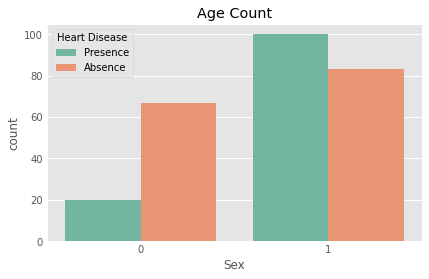

In [388]:
#Age count
sns.countplot(data=df, x='Sex',hue='Heart Disease',palette='Set2')
plt.title('Age Count')

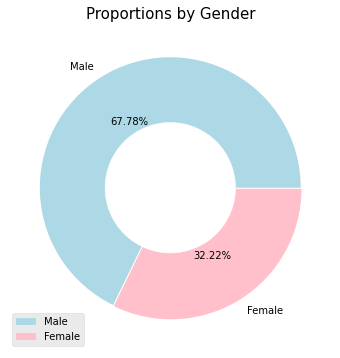

In [389]:
size_complete = df['Sex'].value_counts()
colors_complete = ['lightblue', 'pink']
labels_complete = "Male", "Female"
explode = [0, 0.01]

#(0,0) is to create the circle and 0.5 for the width of the circle, white is for the center of the circle
my_circle_complete = plt.Circle((0, 0), 0.5, color = 'white')

plt.figure(figsize=(8,6))
plt.pie(size_complete, colors = colors_complete, labels = labels_complete, shadow = False, explode = explode, autopct = '%.2f%%')
plt.title('Proportions by Gender', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(my_circle_complete)
plt.legend()
plt.show()

0 stands for female and 1 for male. There are more men in the dataset and men are more propense to have heart failures, than women.

Text(0.5, 1.0, 'Age Distribution for all the dataset ')

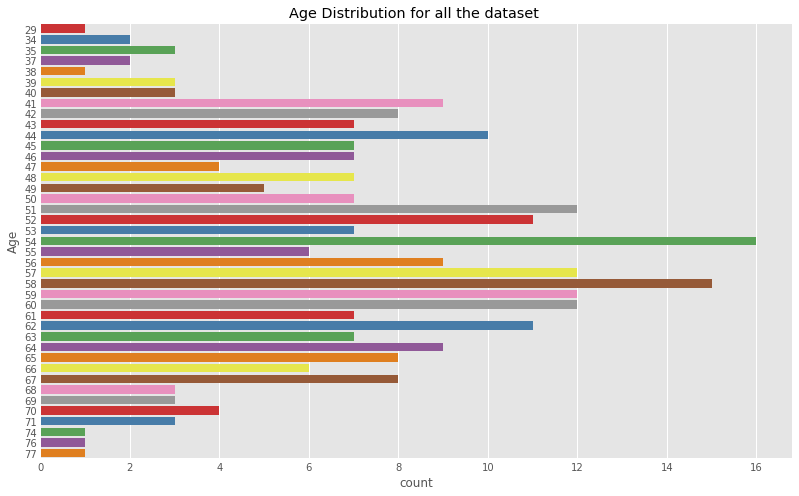

In [390]:
#age distribution
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='Age',palette='Set1')
plt.title('Age Distribution for all the dataset ')

This is the age distribution of our dataset, regardless of whether you have heart disease or not, the average is 54 years as we saw in the dataset information.

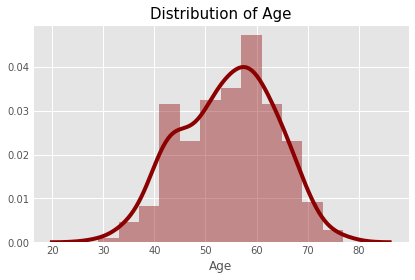

In [391]:
sns.distplot(df['Age'], color = 'darkred')
plt.title('Distribution of Age', fontsize = 15)
plt.show()

Most of the people in our dataset are between the 40 and 65 range, but at this point we have not yet separated the people with heart problems.

In [392]:
#Creating a new dataframe and dropping age and target
bars = df
bars = bars.drop(columns=['Age'])

In [393]:
#Creating function to change the values of the gender
def gender_transform(value):
  if value == 0:
    return 'female'
  elif value == 1:
    return 'male'

In [394]:
#Applying function to change values
bars['Sex'] = bars['Sex'].apply(gender_transform)

In [395]:
list_types=bars['Sex'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabetically

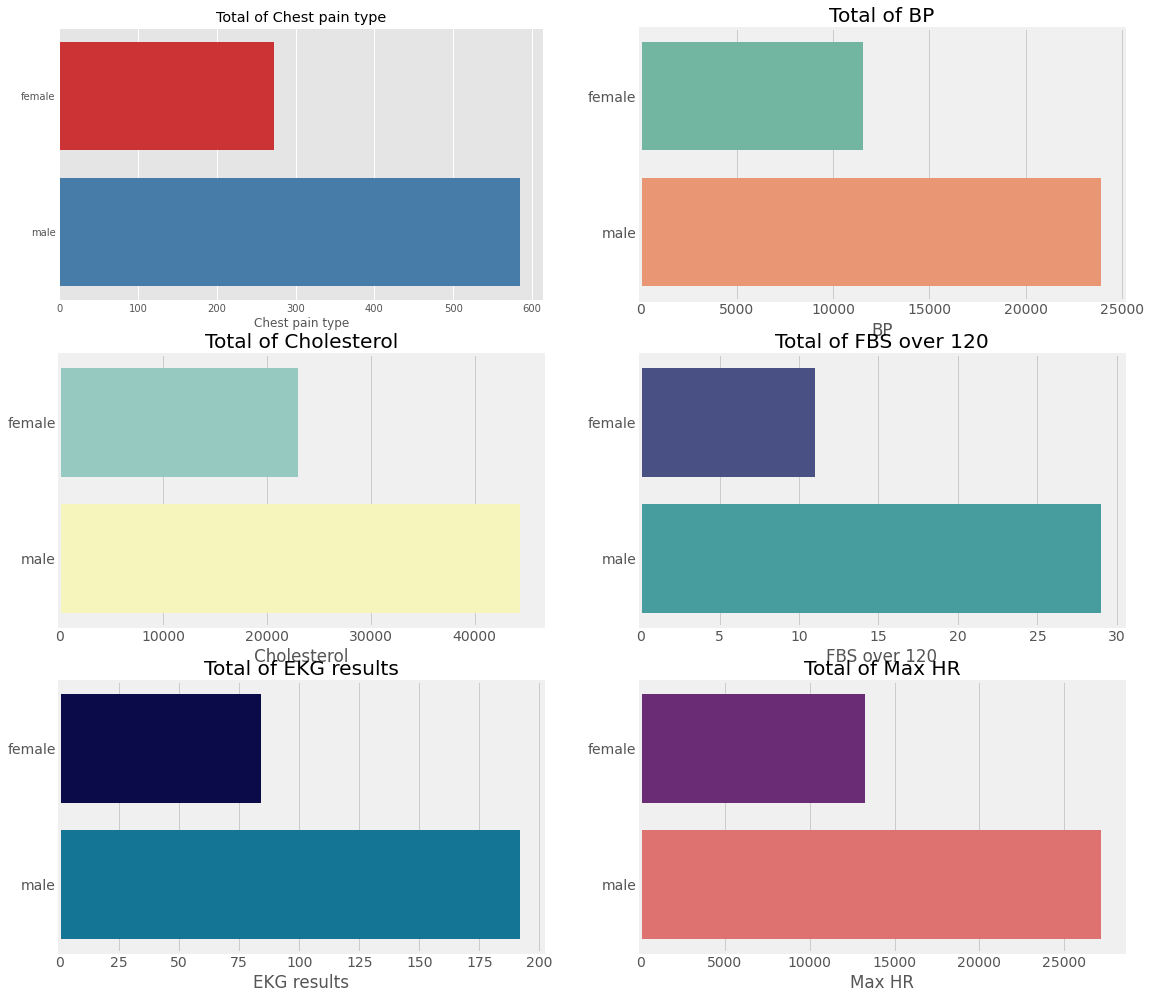

In [396]:
#Lets check the first six stats for both genders
stats=df[['Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR']]
k=1
m=0
palette=['Set1','Set2','Set3','mako','ocean','magma']
plt.figure(figsize=(17,17))
for i in stats:
    plt.subplot(3,2,k)
    k=k+1
    sns.barplot(x=bars.groupby('Sex').sum()[i],y=list_types,palette=palette[m])
    m=m+1
    plt.title(str('Total of '+i))
    plt.style.use('fivethirtyeight')

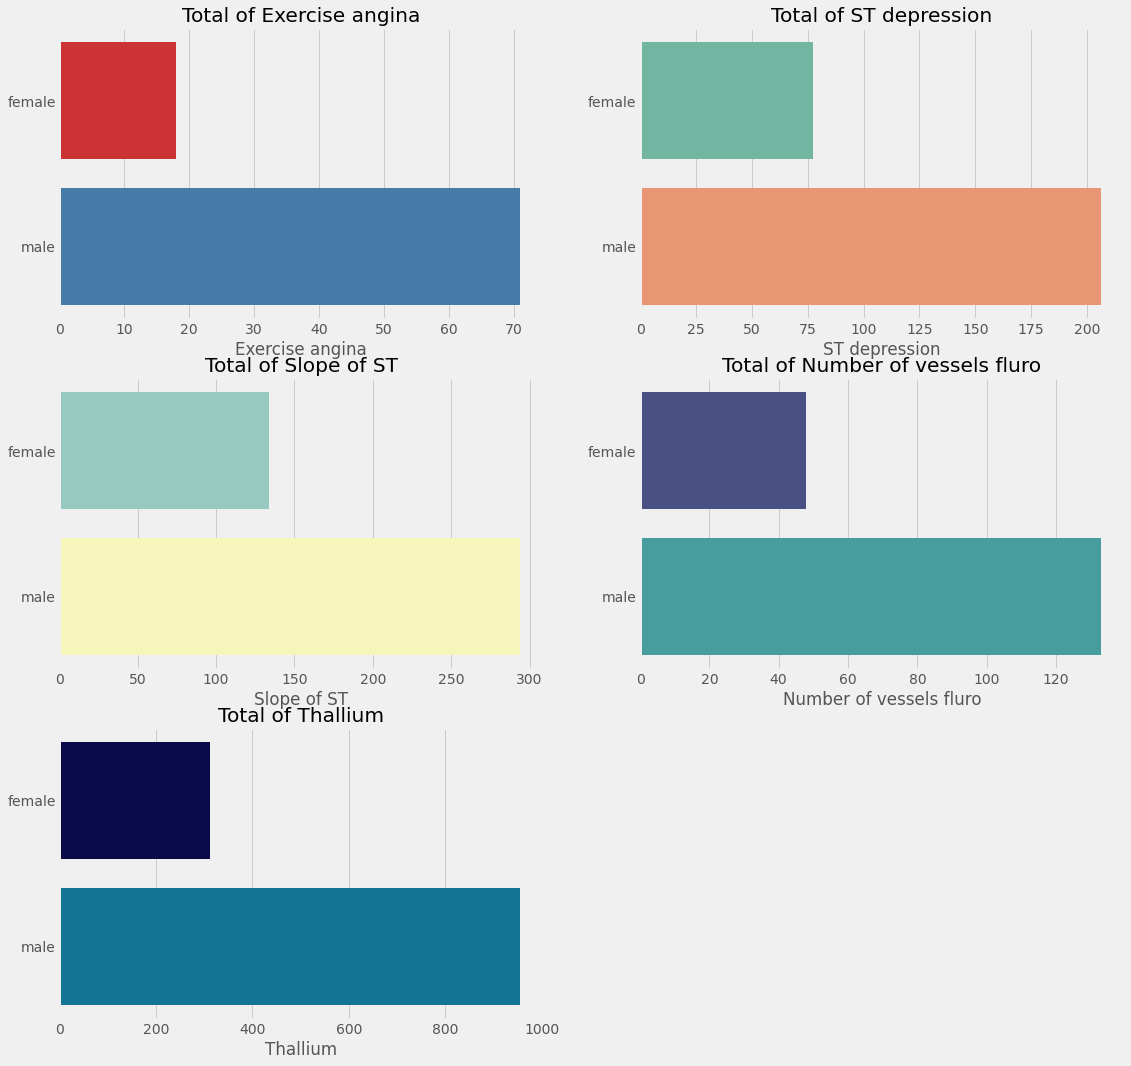

In [397]:
#Lets check the first six stats for both genders
stats2=df[['Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']]
k=1
m=0
palette=['Set1','Set2','Set3','mako','ocean']
plt.figure(figsize=(17,17))
for i in stats2:
    plt.subplot(3,2,k)
    k=k+1
    sns.barplot(x=bars.groupby('Sex').sum()[i],y=list_types,palette=palette[m])
    m=m+1
    plt.title(str('Total of '+i))
    plt.style.use('fivethirtyeight')

<Figure size 864x720 with 0 Axes>

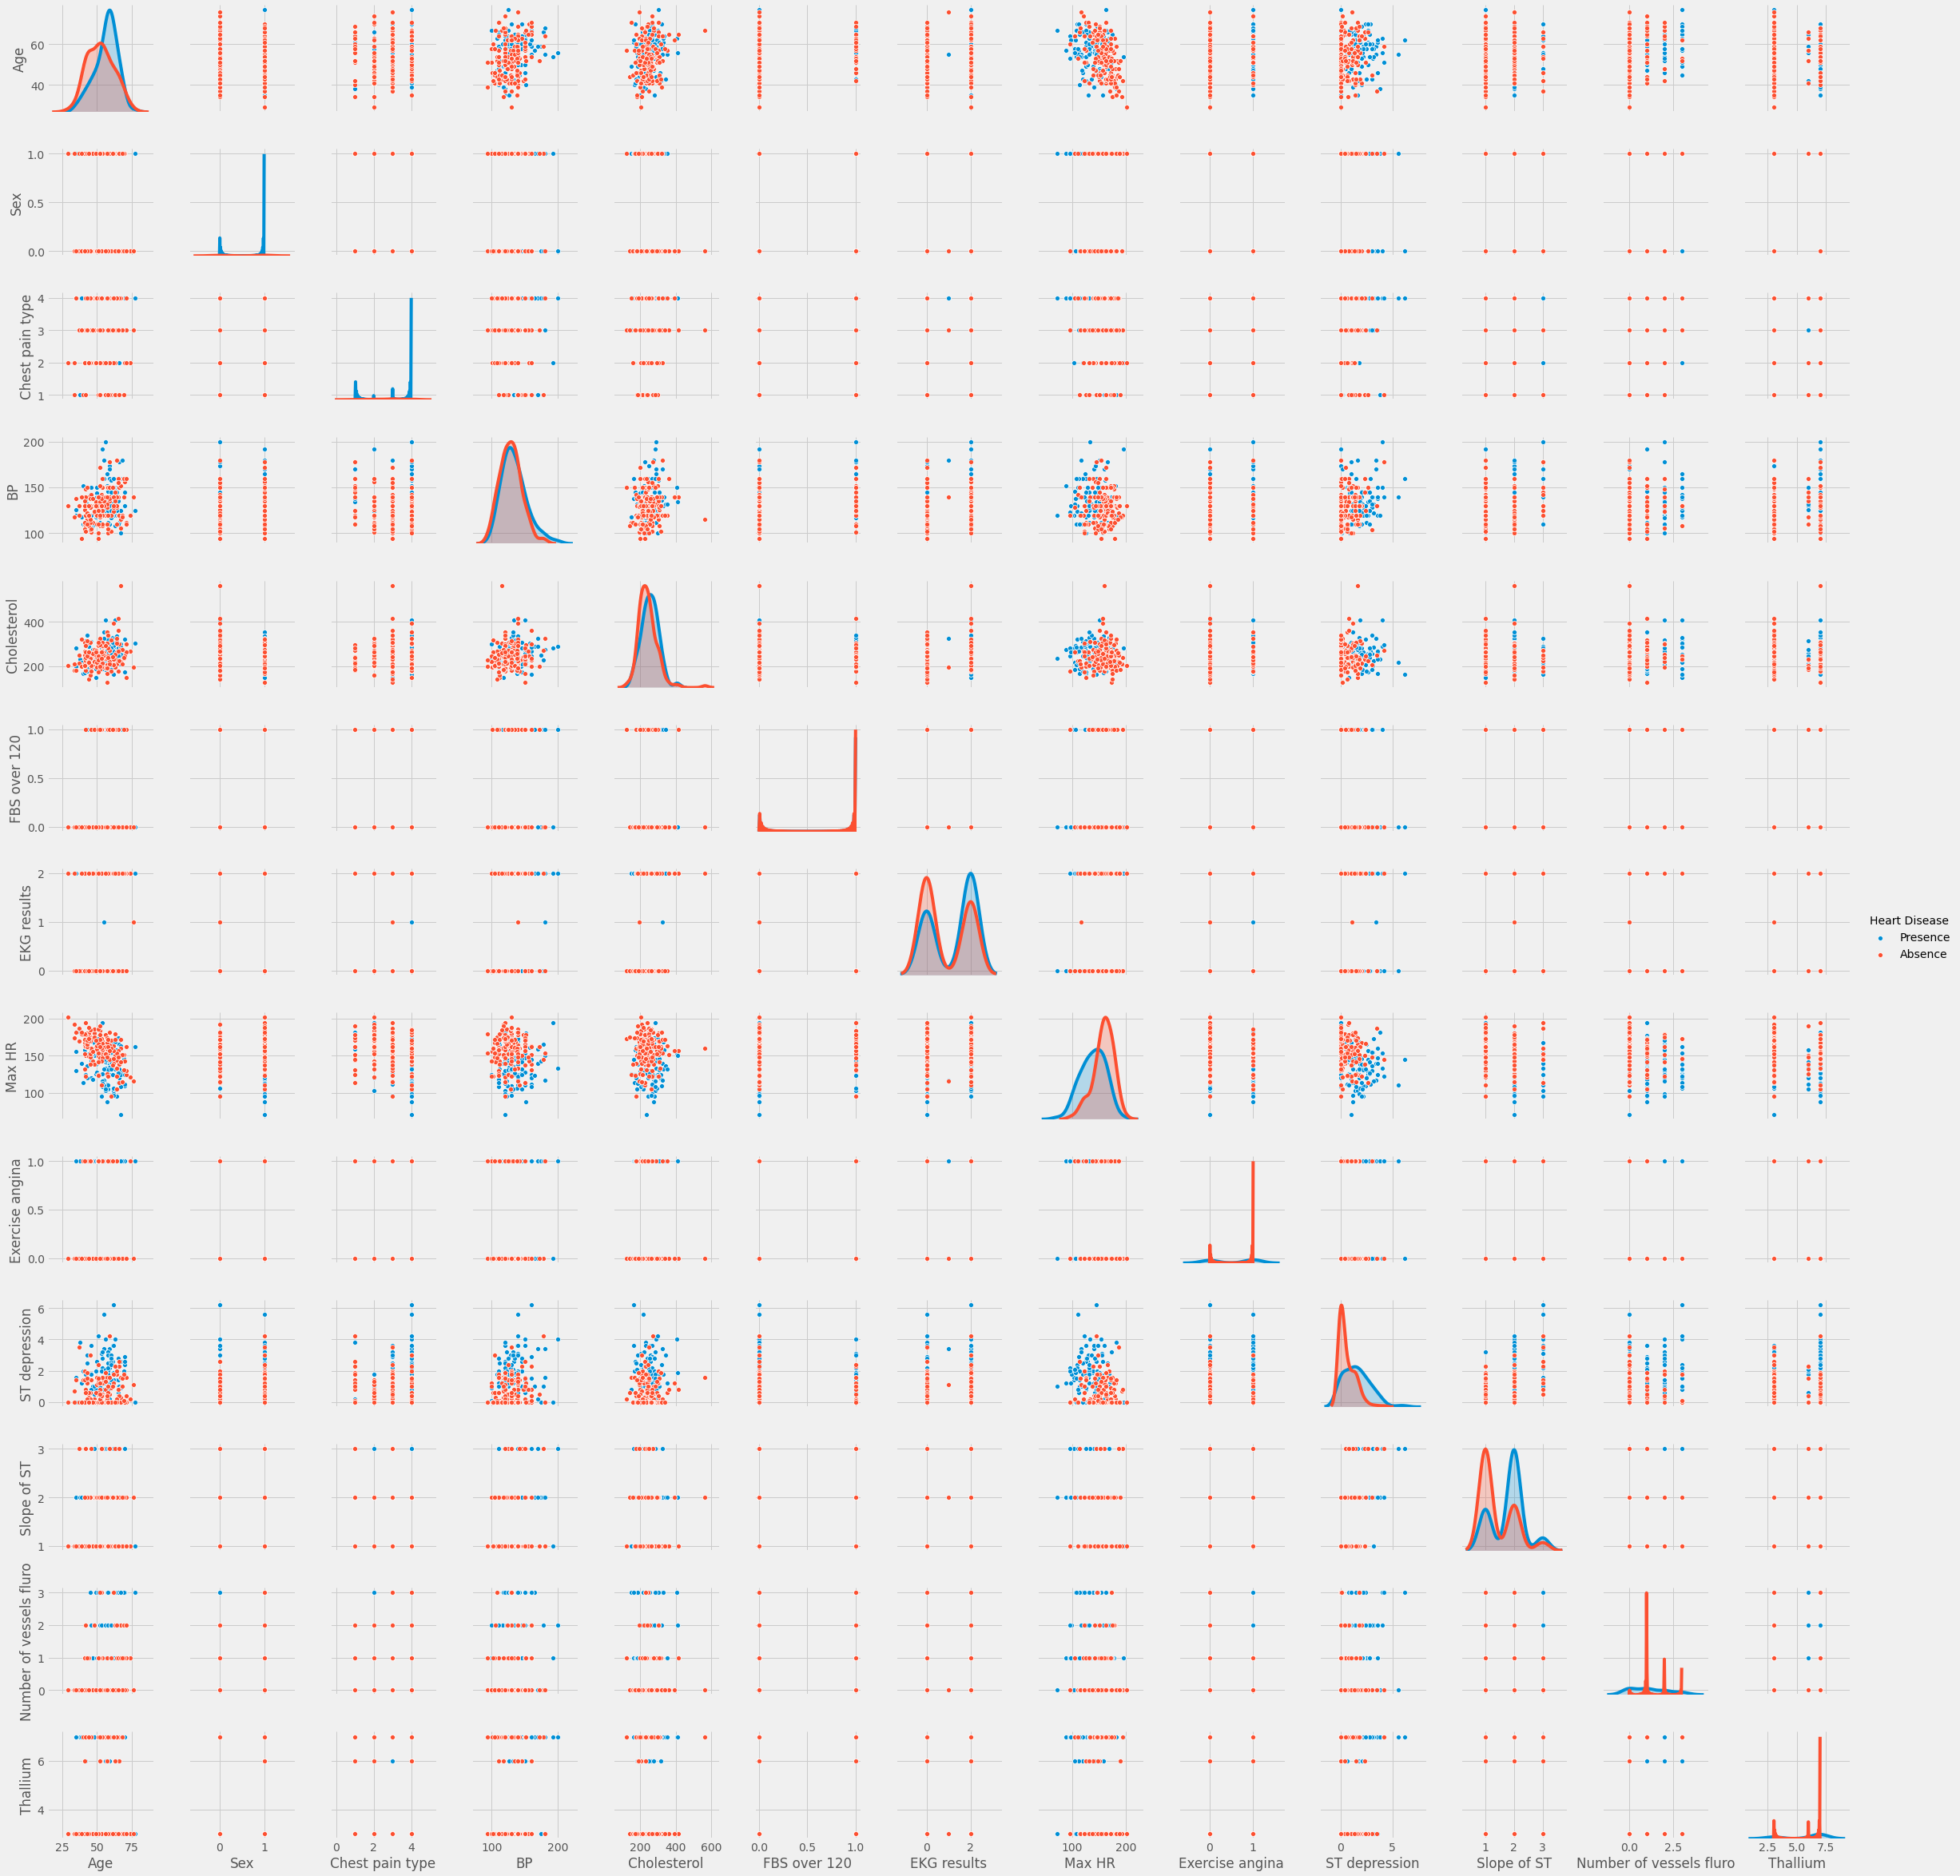

In [398]:
#Pairtplot
plt.figure(figsize=(12,10))
sns.pairplot(df,hue='Heart Disease')

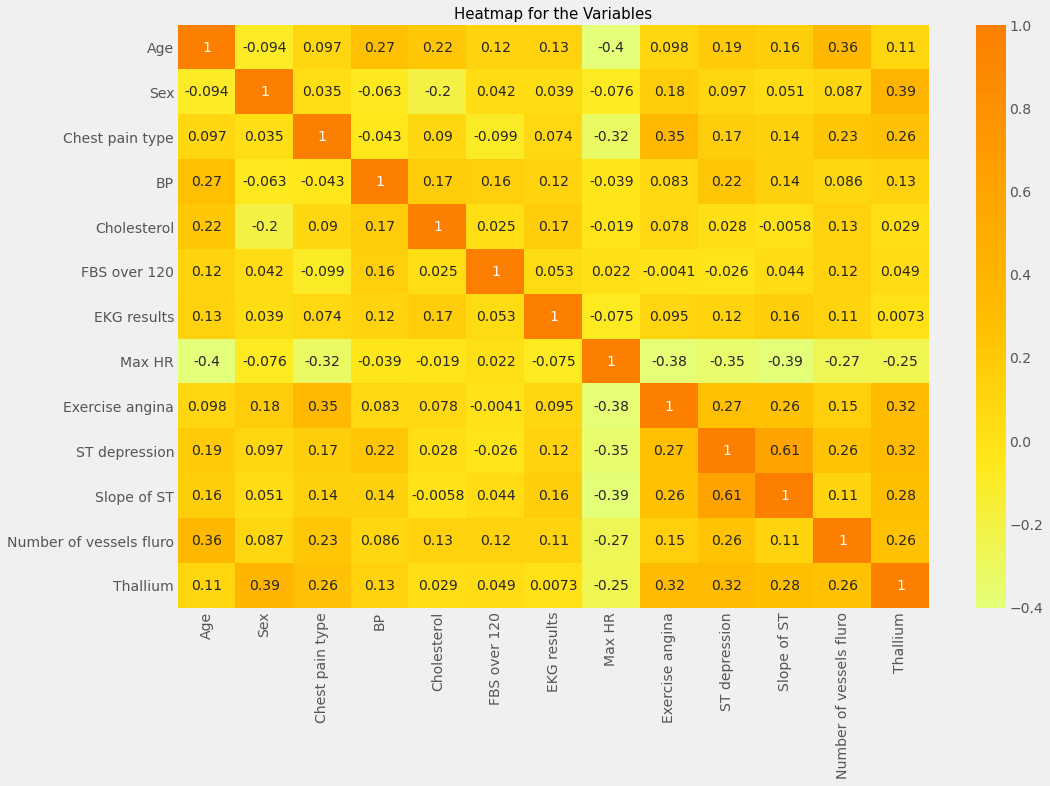

In [399]:
#Let´s see the correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.style.use('fivethirtyeight')
plt.title('Heatmap for the Variables', fontsize = 15)
plt.show()

In [400]:
#Filtering the people with heart disease issues
heart_disease = df[df['Heart Disease']=='Presence']

In [401]:
#Filtering people without heart disease proeblems
no_heart_disease = df[df['Heart Disease']=='Absence']

## **PEOPLE WITH HEART DISEASE EXPLORATORY ANALYSIS**

Since we want to know the information about people with heart disease issues, let´s separate them and make an exploratory data analysis.

In [402]:
heart_disease.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000
mean,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.22500,138.858333,0.55000,1.584167,1.816667,1.150000,5.833333
std,8.116273,0.374241,0.779823,19.095424,47.969166,0.350170,0.97414,23.130719,0.49958,1.282067,0.564843,1.034286,1.769648
min,35.000000,0.000000,1.000000,100.000000,149.000000,0.000000,0.00000,71.000000,0.00000,0.000000,1.000000,0.000000,3.000000
25%,52.000000,1.000000,4.000000,120.000000,227.250000,0.000000,0.00000,124.750000,0.00000,0.600000,1.000000,0.000000,3.000000
50%,58.000000,1.000000,4.000000,130.000000,255.500000,0.000000,2.00000,141.500000,1.00000,1.400000,2.000000,1.000000,7.000000
75%,62.000000,1.000000,4.000000,145.000000,286.500000,0.000000,2.00000,157.250000,1.00000,2.425000,2.000000,2.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,409.000000,1.000000,2.00000,195.000000,1.00000,6.200000,3.000000,3.000000,7.000000


**People:** There are 120 of 270 that have heart diseases.

**Age**: The average Age for people with heart disease is 56 years.

Text(0.5, 1.0, 'People with Heart Disease splitted by Gender')

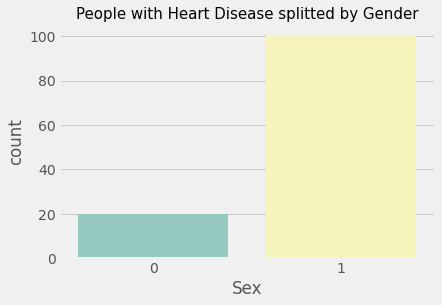

In [403]:
#Age count
sns.countplot(data=heart_disease, x='Sex',palette='Set3')
plt.title('People with Heart Disease splitted by Gender',fontsize=15)

**Men:** there are 100 men with heart disease.

**women:** there are 20 women with heart disease

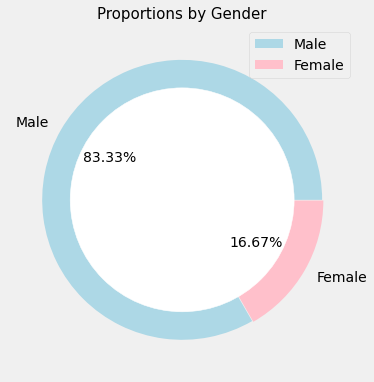

In [404]:
size = heart_disease['Sex'].value_counts()
colors = ['lightblue', 'pink']
labels = "Male", "Female"
explode = [0, 0.01]

#(0,0) is to create the circle and 0.5 for the width of the circle, white is for the center of the circle
my_circle = plt.Circle((0, 0), 0.8, color = 'white')

plt.figure(figsize=(8,6))
plt.pie(size, colors = colors, labels = labels, shadow = False, explode = explode, autopct = '%.2f%%')
plt.title('Proportions by Gender', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0.5, 1.0, 'AGES FOR PEOPLE WITH HEART DISEASE')

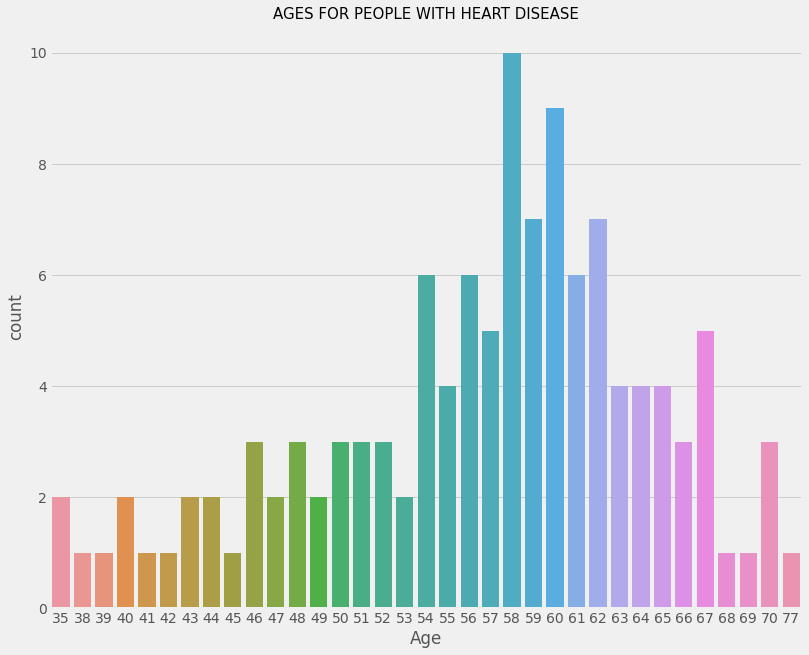

In [405]:
#Age start and ending for people with heart disease
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')
sns.countplot(data=heart_disease,x='Age')
plt.title('AGES FOR PEOPLE WITH HEART DISEASE',fontsize=15)

Text(0.5, 1.0, 'Women with Heart Disease Age Distribution')

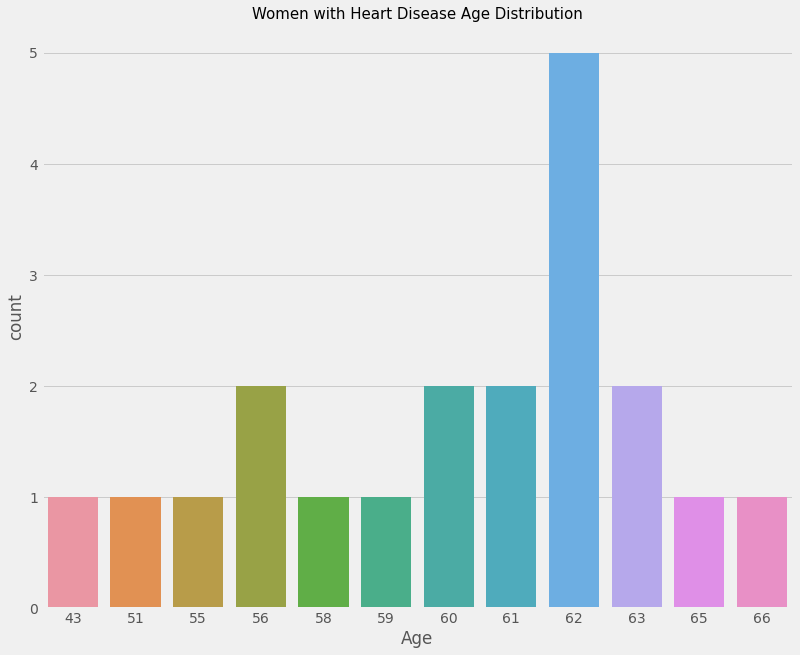

In [406]:
#Age start and ending for women with heart disease
women_heart = heart_disease[heart_disease['Sex']==0]
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')
sns.countplot(data=women_heart,x='Age')
plt.title('Women with Heart Disease Age Distribution',fontsize=15)

Start age for women with heart disease begins at age of 43 and ends at age of 66.

Text(0.5, 1.0, 'Men with Heart Disease Age Distribution')

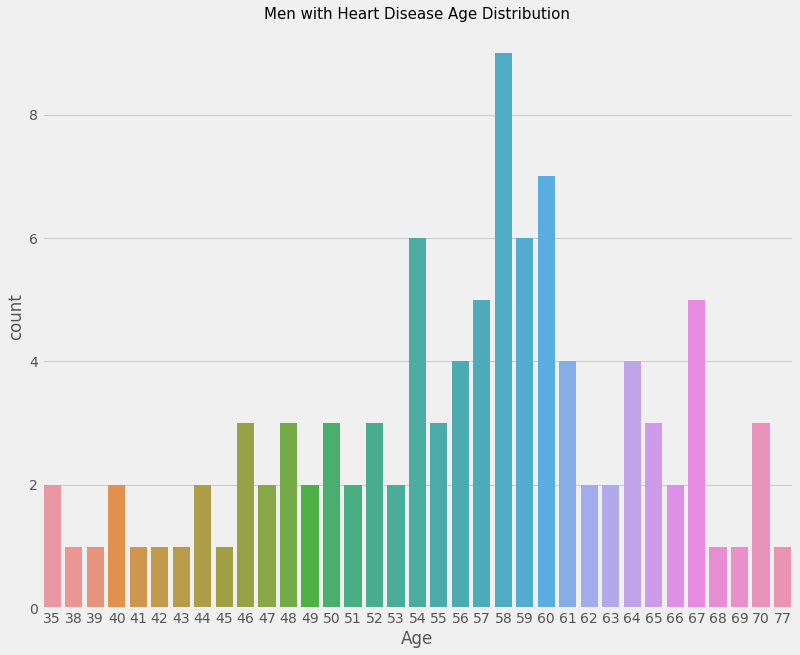

In [407]:
#Age start and ending for people with heart disease
men_heart = heart_disease[heart_disease['Sex']==1]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
sns.countplot(data=men_heart,x='Age')
plt.title('Men with Heart Disease Age Distribution',fontsize=15)

Start age for men with heart disease begins at age of 35 and ends at age of 77

## **Attributes with higher importance**
We will use an ExtraTreesClassifier to obtain multiple decision trees that tell us which variables are most significant for our model.

In [408]:
#Separating the characteristicas from the targe variable
X_feature = df.iloc[:,:13]
y_feature = df.iloc[:,-1]

In [409]:
#Importing ExtraTressClassifier
from sklearn.ensemble import ExtraTreesClassifier
model_feature = ExtraTreesClassifier()
model_feature.fit(X_feature,y_feature)
print(model_feature.feature_importances_) #use inbuilt class

[0.06949793 0.04488879 0.10313782 0.06587649 0.06293551 0.02232113
 0.03482034 0.07722303 0.07956027 0.0793281  0.06544202 0.12711147
 0.16785711]


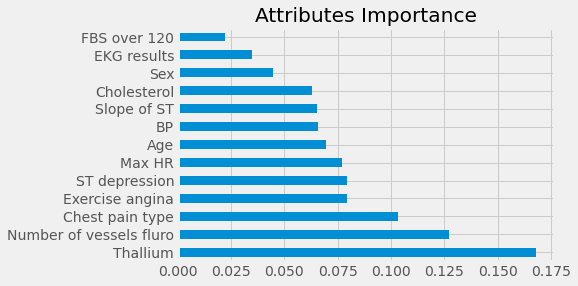

In [410]:
#graficar las caracteristicas más importantes para observarlas
feat_importances = pd.Series(model_feature.feature_importances_, index=X_feature.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.title('Attributes Importance')
plt.show()

it´s observable that the Thallium is the most important attributes of all, followed by the Number of vessels fluro and Chest Pain.

Since every attribute seems to be important, let´s use all of them to predict the target variable.

## **MACHINE LEARNING APPROACH**

Since we have the Target variable, let´s use supervised learning.

In [411]:
#Separating the attributes from the target variable
x = df.iloc[:,:13]
y = df.iloc[:,-1]

In [412]:
#Train 80% test 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [413]:
#Normalizing values between range [-1,1]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### **K-NEAREST NEIGHBOR**

In [414]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=16)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [415]:
y_pred = classifier.predict(X_test)

In [416]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  3]
 [ 3 19]]
              precision    recall  f1-score   support

     Absence       0.91      0.91      0.91        32
    Presence       0.86      0.86      0.86        22

    accuracy                           0.89        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54



In [417]:
from sklearn.metrics import accuracy_score
knearest_accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy for the K-nearest Neighbor with 16 Neighbors is: {knearest_accuracy}')

The accuracy for the K-nearest Neighbor with 16 Neighbors is: 0.8888888888888888


**Let´s look for a better K**

In [418]:

from sklearn import metrics
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 29)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8518518518518519, 0.8518518518518519, 0.8333333333333334, 0.8333333333333334, 0.8518518518518519, 0.8333333333333334, 0.8333333333333334, 0.8518518518518519, 0.8703703703703703, 0.8518518518518519, 0.8703703703703703, 0.8333333333333334, 0.8518518518518519, 0.8888888888888888, 0.8703703703703703, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8703703703703703, 0.8888888888888888, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703]


Text(0, 0.5, 'Testing Accuracy')

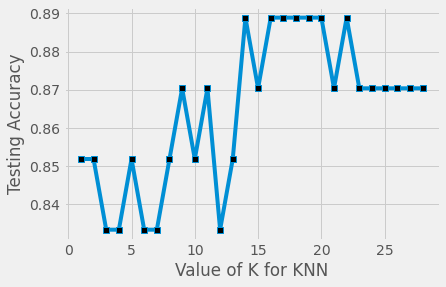

In [419]:

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores,marker='s',markerfacecolor='black')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**With 4 Neighbors the Algorithm reach the best accuracy, so let´s fit again the algorithm with 4 neighbors.**

In [420]:
#Fitting Algorithm Again
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [421]:
#Predicted labels
y_pred = classifier.predict(X_test)

In [422]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Absence       0.83      0.91      0.87        32
    Presence       0.84      0.73      0.78        22

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.82        54
weighted avg       0.83      0.83      0.83        54



In [423]:
#Calculating accuracy Again
knearest_accuracy_improvement = accuracy_score(y_test,y_pred)
print(f'The accuracy for the K-nearest Neighbor with 4 neighbors is: {knearest_accuracy_improvement}')

The accuracy for the K-nearest Neighbor with 4 neighbors is: 0.8333333333333334


[Text(0, 0.5, 'Absence'), Text(0, 1.5, 'Presence')]

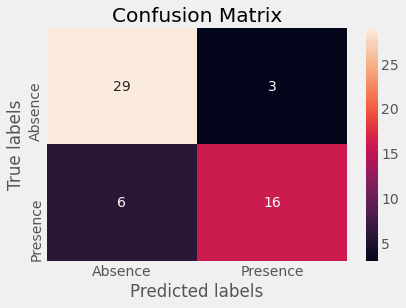

In [424]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Absence', 'Presence']); ax.yaxis.set_ticklabels(['Absence', 'Presence'])

Let´s compare the K-value with the **Error rate**

In [425]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

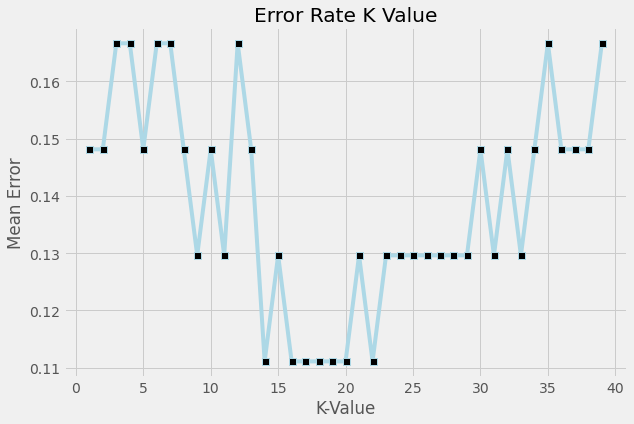

In [426]:
plt.figure(figsize=(9, 6))
plt.plot(range(1, 40), error, color='lightblue', linestyle='solid', marker='s',
         markerfacecolor='black', markersize=7)
plt.title('Error Rate K Value')
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

### **MULTILAYER PERCEPTRON**

In [427]:
#Data Splitting
X_mlp = df.iloc[:,:13]
y_mlp = df.iloc[:,-1]

In [428]:
#Creating OneHotEncoding for the targe variables
from sklearn.preprocessing import OneHotEncoder
y_mlp = pd.DataFrame(y_mlp) 
ohe = OneHotEncoder()
y_mlp = ohe.fit_transform(y_mlp).toarray()

In [429]:
#train and test Spliting
from sklearn.model_selection import train_test_split
X_train_deep, X_test_deep, y_train_deep, y_test_deep = train_test_split(X_mlp,y_mlp,test_size=0.3)

In [430]:
#Normalizing values between range [-1,1]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_deep = sc.fit_transform(X_train_deep)
X_test_deep = sc.fit_transform(X_test_deep)

In [493]:
#Using Keras to fit the MLP model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import random
random.seed(30)
#Creating model and adding Hidden Layers
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
#Droput
model.add(Dropout(0.01))
#classification Layer
model.add(Dense(2, activation='softmax'))
#Optimizer
opt = keras.optimizers.SGD(lr=0.01, nesterov= False, momentum=0.9, decay=1e-6)
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 8)                 112       
_________________________________________________________________
dropout_15 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_115 (Dense)            (None, 2)                 18        
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [494]:
#Compilando modelo
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [495]:
history = model.fit(X_train_deep, y_train_deep,validation_data = (X_test_deep,y_test_deep), epochs=60, batch_size=20)

Epoch 1/60
10/10 [==============================] - 0s 15ms/step - loss: 0.7388 - accuracy: 0.6085 - val_loss: 0.7359 - val_accuracy: 0.5432
Epoch 2/60
10/10 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7513 - val_loss: 0.6087 - val_accuracy: 0.6914
Epoch 3/60
10/10 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8095 - val_loss: 0.5678 - val_accuracy: 0.7284
Epoch 4/60
10/10 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.8148 - val_loss: 0.5377 - val_accuracy: 0.7531
Epoch 5/60
10/10 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8148 - val_loss: 0.5158 - val_accuracy: 0.7778
Epoch 6/60
10/10 [==============================] - 0s 4ms/step - loss: 0.3731 - accuracy: 0.8254 - val_loss: 0.5028 - val_accuracy: 0.7654
Epoch 7/60
10/10 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8201 - val_loss: 0.4933 - val_accuracy: 0.7778
Epoch 8/60
10/10 [=

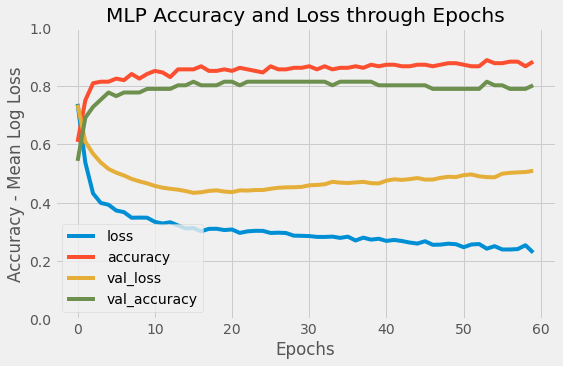

In [496]:
#Accuracy Plot
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.title('MLP Accuracy and Loss through Epochs')
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [497]:
#Accuract for the FFNN
results[-1:]

,loss,accuracy,val_loss,val_accuracy
59,0.228853,0.883598,0.509365,0.802469
